# Emotionflow Metaflow stats

Analysis of metaflow saved state data.
Run the metaflow once so you may access the saved data here:

```
python emotionflow.py --environment=conda run
python emotionflow.py --environment=conda show # shows steps that would be executed
python emotionflow.py --environment=conda resume # resume just before failed step
python emotionflow.py --environment=conda resume stepname # resume from stepname
```

In [14]:
from metaflow import Flow, get_metadata

In [15]:
print("Using metadata provider: %s" % get_metadata())

Using metadata provider: local@/home/lukas/git/dajare/emotion


In [16]:
run = Flow("EmotionFlow").latest_run
#run = Flow("EmotionFlow").latest_successful_run
print("Using analysis from '%s'" % str(run))

Using analysis from 'Run('EmotionFlow/1582290248990917')'


In [17]:
run.created_at

'2020-02-21T13:04:08.%fZ'

In [18]:
load_data = run['load'].task.data
ecorp = load_data.ecorp
available_emotions = run['load'].task.data.available_emotions
print(ecorp)
print(available_emotions)

       Word Katakana Emotion
0         哀       アイ       悲
1         愛       アイ       好
2     相いれない   アイイレナイ       嫌
3        哀感     アイカン       悲
4        愛敬    アイキョウ      好親
...     ...      ...     ...
1973    悪賢い   ワルガシコイ       嫌
1974   悪びれる    ワルビレル       謝
1975  我を忘れる  ワレオワスレル       興
1976     わぁ       ワー       喜
1977    わーい      ワーイ       喜

[1978 rows x 3 columns]
        Emotion Symbol
0           安らぎ      安
1           楽しさ      楽
2           親しみ      親
3         尊敬・尊さ      尊
4            感謝      感
5        気持ちが良い      気
6          誇らしい      誇
7            感動      動
8            喜び      喜
9           悲しさ      悲
10          寂しさ      寂
11           不満      不
12          切なさ      切
13          苦しさ      苦
14           不安      ふ
15           憂鬱      鬱
16           辛さ      辛
17           好き      好
18           嫌悪      嫌
19        恥ずかしい      恥
20           焦り      焦
21           驚き      驚
22           怒り      怒
23          幸福感      幸
24           恨み      恨
25  恐れ（恐縮等の意味で）      恐
26    

Check what emotions are available, multiple emotions per sentence!

/home/lukas/.local/share/virtualenvs/emotion-fU7OZW6I/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23244 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lukas/.local/share/virtualenvs/emotion-fU7OZW6I/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lukas/.local/share/virtualenvs/emotion-fU7OZW6I/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21916 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lukas/.local/share/virtualenvs/emotion-fU7OZW6I/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lukas/.local/share/virtualenvs/emotion-fU7OZW6I/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 

/home/lukas/.local/share/virtualenvs/emotion-fU7OZW6I/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12365 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/lukas/.local/share/virtualenvs/emotion-fU7OZW6I/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12405 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/lukas/.local/share/virtualenvs/emotion-fU7OZW6I/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12383 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/lukas/.local/share/virtualenvs/emotion-fU7OZW6I/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0, flags=flags)


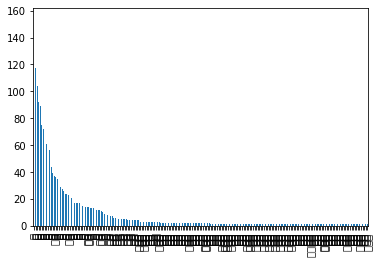

In [19]:
ecorp.Emotion.value_counts().plot.bar()

In [20]:
input_sentences = run['prepare_tokens'].task.data.input_sentences
input_sentences

[['哀'],
 ['愛'],
 ['相', 'いれ', 'な', 'い'],
 ['哀感'],
 ['愛敬'],
 ['愛好'],
 ['哀愁'],
 ['愛執'],
 ['哀傷'],
 ['愛情'],
 ['愛', 'する'],
 ['哀惜'],
 ['哀切'],
 ['愛想', 'を', '尽か', 'す'],
 ['愛着'],
 ['哀悼'],
 ['愛慕'],
 ['愛欲'],
 ['愛らし', 'い'],
 ['青息', '吐息'],
 ['仰', 'ぐ'],
 ['青筋', 'を', '立て', 'る'],
 ['赤恥'],
 ['赤ら', 'む'],
 ['赤らめ', 'る'],
 ['崇め', 'る'],
 ['飽き飽き'],
 ['飽き足り', 'る'],
 ['諦め'],
 ['諦め', 'る'],
 ['飽き', 'る'],
 ['呆れ返', 'る'],
 ['呆れ', '果て', 'る'],
 ['呆れ', 'る'],
 ['悪', '感情'],
 ['倦', 'む'],
 ['憧れ'],
 ['憧れ', 'る'],
 ['浅まし', 'い'],
 ['嘲', 'る'],
 ['味気', 'な', 'い'],
 ['焦り'],
 ['焦', 'る'],
 ['唖然'],
 ['頭', 'に', '来る'],
 ['頭', 'を', '悩', 'ま', 'せ', 'る'],
 ['当たり散ら', 'す'],
 ['あッ'],
 ['あっけな', 'い'],
 ['呆気', 'に', '取', 'ら', 'れ', 'る'],
 ['圧迫', '感'],
 ['熱', 'い'],
 ['熱', 'い', 'もの', 'が', 'こみ上げ', 'る'],
 ['厚かまし', 'い'],
 ['熱', 'く', 'な', 'る'],
 ['暑苦し', 'い'],
 ['後味', 'が', '良', 'く', 'な', 'い'],
 ['後味', 'が', '宜し', 'く', 'な', 'い'],
 ['後味', 'が', '悪', 'い'],
 ['侮', 'る'],
 ['阿鼻', '叫喚'],
 ['危な', 'い'],
 ['あほらし', 'い'],
 ['荒々し', 'い'],
 ['あらッ'],
 ['ありがた', 'い'],
 ['あり

In [21]:
labels = run['prepare_tokens'].task.data.labels
labels

['悲しさ',
 '好き',
 '嫌悪',
 '悲しさ',
 '好き',
 '好き',
 '寂しさ',
 '好き',
 '悲しさ',
 '好き',
 '好き',
 '悲しさ',
 '悲しさ',
 'あきれ',
 '好き',
 '悲しさ',
 '好き',
 '好き',
 '安らぎ',
 '失望',
 '尊敬・尊さ',
 '怒り',
 '恥ずかしい',
 '恥ずかしい',
 '恥ずかしい',
 '尊敬・尊さ',
 '不満',
 '不満',
 '辛さ',
 '辛さ',
 '不快',
 'あきれ',
 'あきれ',
 'あきれ',
 '嫌悪',
 '不快',
 '尊敬・尊さ',
 '尊敬・尊さ',
 '嫌悪',
 '嫌悪',
 '不快',
 '焦り',
 '焦り',
 '困惑',
 '怒り',
 '悩み',
 '怒り',
 '驚き',
 'あきれ',
 '困惑',
 '恐怖',
 '興奮',
 '興奮',
 '嫌悪',
 '興奮',
 '嫌悪',
 '不快',
 '不快',
 '不快',
 '見下し',
 '恐怖',
 '恐怖',
 '困惑',
 '恐怖',
 '驚き',
 '感謝',
 '感謝',
 '不満',
 '感謝',
 '感謝',
 '驚き',
 '焦り',
 '焦り',
 'あわれみ',
 'あわれみ',
 'あわれみ',
 'あわれみ',
 '楽しさ',
 '不快',
 '穏やか',
 '驚き',
 '安らぎ',
 '心配',
 '悲しさ',
 '安らぎ',
 '失望',
 '穏やか',
 '安らぎ',
 '穏やか',
 '安らぎ',
 '喜び',
 '親しみ',
 '嫌悪',
 '恐怖',
 '怒り',
 '怒り',
 '怒り',
 '怒り',
 'あきれ',
 '驚き',
 '嫌悪',
 '嫌悪',
 '辛さ',
 '辛さ',
 '辛さ',
 '辛さ',
 '興奮',
 '憂鬱',
 '怒り',
 '怒り',
 '悩み',
 '恥ずかしい',
 '怒り',
 '興奮',
 '興奮',
 '恐怖',
 '嫌悪',
 '嫌悪',
 '見下し',
 '恨み',
 '尊敬・尊さ',
 '恨み',
 'きまずさ',
 '嫌悪',
 '嫌悪',
 '喜び',
 '驚き',
 '辛さ',
 'あわれみ',
 'あわれみ',
 'あわれみ',
 '辛さ',
 '恐れ（恐縮

In [22]:
assert len(labels) == len(input_sentences)

## Test corpus and analysis

In [24]:
import keras

cwid = run['create_word_index'].task.data
word2id = cwid.word2id
max_words = cwid.max_words
label2id = cwid.label2id
id2label = cwid.id2label

In [75]:
import Mykytea
opt = "-model /usr/local/share/kytea/model.bin"
mk = Mykytea.Mykytea(opt)
sample_text = '愛は愛敬の愛好'
tokenized_sample =  [word for word in mk.getWS(sample_text)]
tokenized_sample

['愛', 'は', '愛敬', 'の', '愛好']

In [76]:
encoded_samples = [[word2id[word] for word in tokenized_sample if word in word2id]]
encoded_samples

[[1, 559, 7, 413, 8]]

In [77]:
attention_model_data = run['attention_model'].task.data
model_with_attentions = attention_model_data.model_with_attentions

import random
import math

# Select random samples to illustrate
#sample_text = random.choice(ecorp["Word"].values.tolist())

# Encode samples
#tokenized_sample = sample_text.split(" ")

# Padding
encoded_samples = keras.preprocessing.sequence.pad_sequences(encoded_samples, maxlen=max_words)

# Make predictions
label_probs, attentions = model_with_attentions.predict(encoded_samples)
label_probs = {id2label[_id]: prob for (label, _id), prob in zip(label2id.items(),label_probs[0])}

# Get word attentions using attenion vector
token_attention_dic = {}
max_score = 0.0
min_score = 0.0
for token, attention_score in zip(tokenized_sample, attentions[0][-len(tokenized_sample):]):
    token_attention_dic[token] = math.sqrt(attention_score)


# VISUALIZATION
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb
    
def attention2color(attention_score):
    r = 255 - int(attention_score * 255)
    color = rgb_to_hex((255, r, r))
    return str(color)
    
# Build HTML String to viualize attentions
html_text = "<hr><p style='font-size: large'><b>Text:  </b>"
for token, attention in token_attention_dic.items():
    html_text += "<span style='background-color:{};'>{} <span> ".format(attention2color(attention),
                                                                        token)
html_text += "</p>"
# Display text enriched with attention scores 
display(HTML(html_text))



/home/lukas/.local/share/virtualenvs/emotion-fU7OZW6I/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


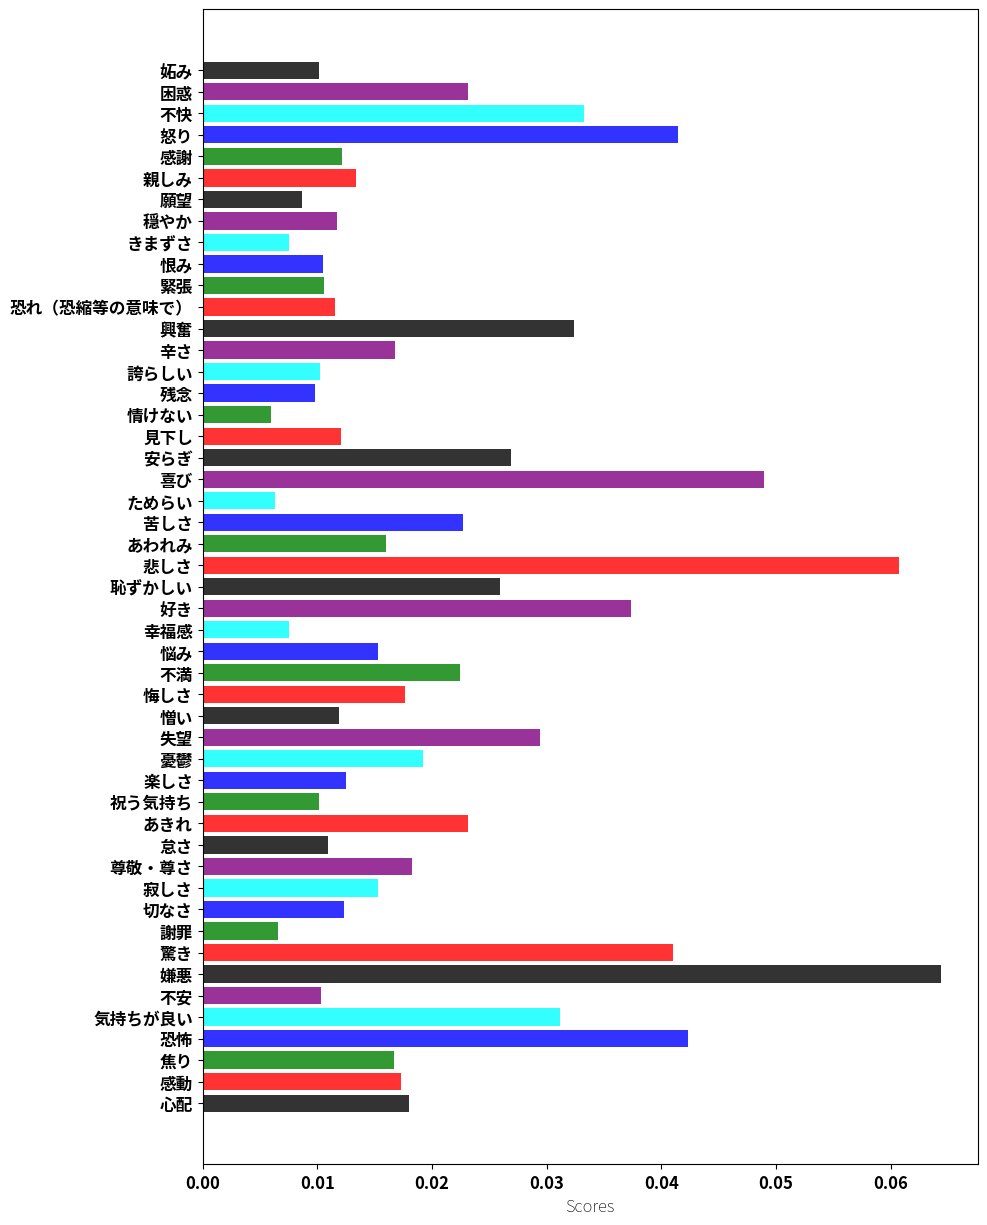

In [78]:
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams
import matplotlib
matplotlib.rc('font', family='Noto Sans CJK JP', size='12', weight='bold')

# PLOT EMOTION SCORES
emotions = [label for label, _ in label_probs.items()]
scores = [score for _, score in label_probs.items()]
plt.figure(figsize=(10,15))
plt.barh(np.arange(len(emotions)), scores, align='center', alpha=0.8, color=['black', 'red', 'green', 'blue', 'cyan', "purple"])
plt.yticks(np.arange(len(emotions)), emotions)
plt.xlabel('Scores')
plt.show()

### Load Emotionpredictor and predict some sentences

### Predict using pickled model

In [69]:
#predictor = pickle.load(open("emotionpredictor.pkl", "rb"))


### Predict using persisted model on flow from Amazon S3
which has actually also been pickled

In [70]:
#predictor = run['deliver_model'].task.data.predictor
